In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
plt.style.use("ggplot")

In [2]:
df=pd.read_csv("E:/piere/Documentos/Portafolio/fraud/Data/processed/fraud_final.csv")

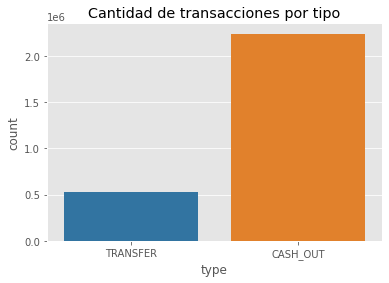

In [3]:
sns.countplot(data=df, x="type", palette="tab10")
plt.title("Cantidad de transacciones por tipo")
plt.show()

In [4]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1
1,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1
2,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0
3,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.0,0.00,0
4,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.0,2719172.89,0
5,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0
6,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0
7,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.0,6453430.91,0
8,1,CASH_OUT,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.0,0.00,0
9,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.0,8383.29,0


In [5]:
df["isFraud"]=df["isFraud"].astype("bool")

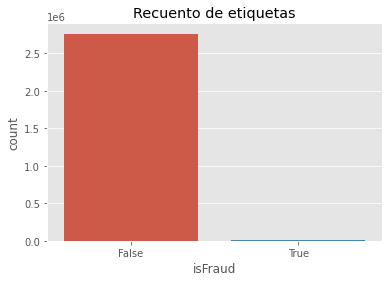

In [6]:
sns.countplot(data=df, x="isFraud")
plt.title("Recuento de etiquetas")
plt.show()

In [7]:
df["isFraud"].value_counts()

False    2762196
True        8213
Name: isFraud, dtype: int64

Claramente, observamos un data set desbalanceado al cual, después, debemos realizar un over  under-sampling para equilibrar la etiquetas.

In [8]:
correlations=df.corr()

<AxesSubplot:>

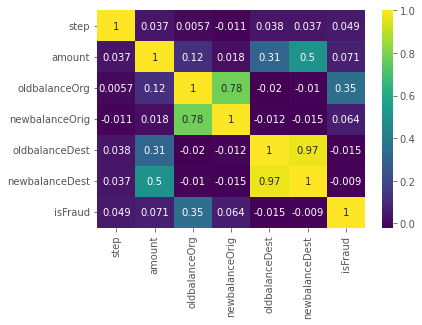

In [9]:
sns.heatmap(correlations, annot=True, cmap="viridis")

Como ustedes pudieron observar, esta es la relación de las diferentes variables existentes en el data set. Más, sin embargo, podemos inferir que existe una poca relación de las variables numéricas de data set. Cosa que investigaremos más adelante para saber como influye en mis datos.

In [120]:
df.describe().round(2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,2770409.00,2770409.00,2770409.00,2770409.00,2.770409e+06,2.770409e+06
mean,10.44,317536.14,47643.08,16091.90,1.703551e+06,2.049734e+06
std,5.89,887789.66,251325.13,151255.82,4.225550e+06,4.676990e+06
min,1.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00
25%,7.00,82973.54,0.00,0.00,1.280734e+05,3.272891e+05
50%,10.00,171260.93,303.96,0.00,5.557100e+05,8.280539e+05
75%,14.00,306791.18,30997.00,0.00,1.735900e+06,2.122198e+06
max,31.00,92445516.64,59585040.37,49585040.37,3.560159e+08,3.561793e+08


Al momento de observar mis métricas de estadística descriptiva, observamos la gran variedad de datos y como vamos a tener muchos datos atípicos por la distribución del monto de la transacción. Además, en conjunción con la matriz de correlación, vemos como las columnas de balances son correlacionales y se parecen estadísticamente. La columna de montos vemos como es realmente dispersa y altamente no normalizada.

A continución, exploraremos los datos por día. 

In [11]:
df["step"]=df["step"].apply(lambda x: math.ceil(x/24))

In [12]:
se_group=pd.DataFrame(df.groupby(["step"])["amount"].agg(["sum","count"]))

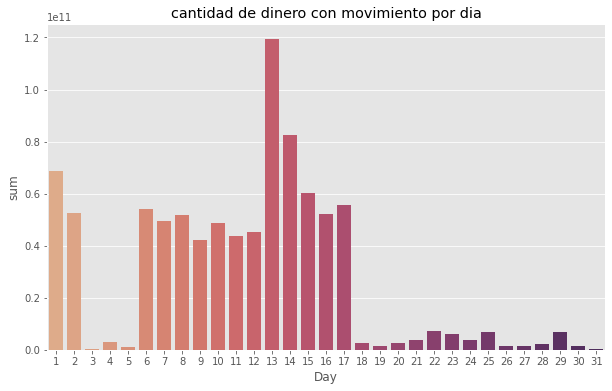

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(data=se_group, x=se_group.index,y="sum", palette="flare")
plt.title("cantidad de dinero con movimiento por dia")
plt.xlabel("Day")
plt.show()

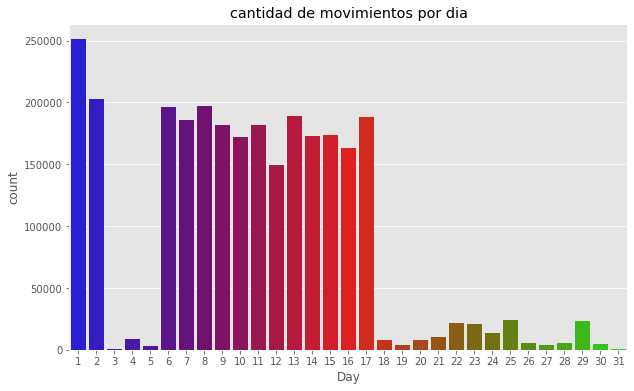

In [121]:
plt.figure(figsize=(10,6))
sns.barplot(data=se_group, x=se_group.index,y="count", palette="brg")
plt.title("cantidad de movimientos por dia")
plt.xlabel("Day")
plt.show()

In [15]:
fraud_gorup=pd.DataFrame(df.groupby(["step"])["isFraud"].value_counts())

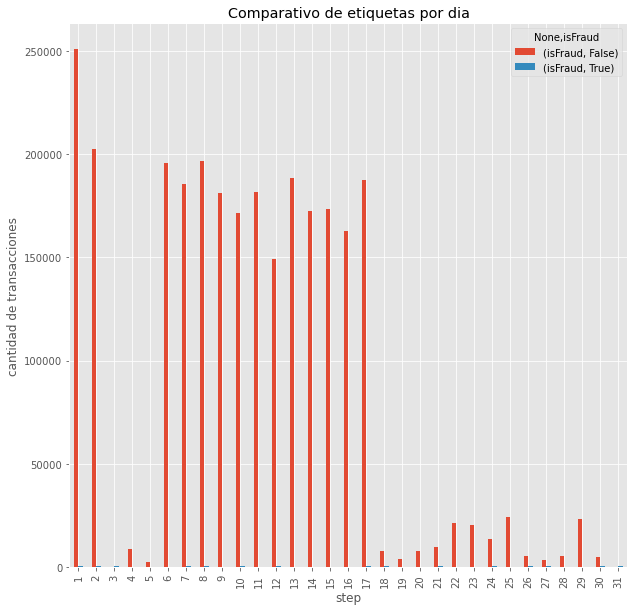

In [114]:
fraud_gorup.unstack(level=1).plot(kind="bar", figsize=(10,10))
plt.title("Comparativo de etiquetas por dia")
plt.ylabel("cantidad de transacciones")
plt.show()



In [23]:
df_fraud=df[df["isFraud"]==True]

In [34]:
df_fraud_group=df_fraud.groupby(["step"])["isFraud"].agg("count")

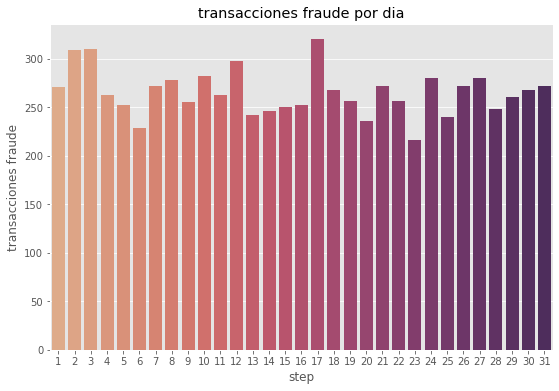

In [111]:
plt.figure(figsize=(9,6))
sns.barplot(x=df_fraud_group.index, y=df_fraud_group.values, palette="flare")
plt.ylabel("transacciones fraude")
plt.title("transacciones fraude por dia")
plt.show()

Ante las anteriores gráficas, se puede observar de forma fácil y clara de como tenemos una gran masa de transacciones a principio y mediados del mes, donde se alcanzan a observar una cifras astronómicas de movimientos. Además, se alcanza a ver de manera gráfica la disparidad entre mis etiquetas que busco identificar. Caso contrario, de las transacciones fraude por día que realmente son relativas, parejas y constantes a través del mes. 

In [122]:
df_fraud["nameOrig"].value_counts()

C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
              ..
C570536992     1
C980546604     1
C58682758      1
C351713185     1
C1280323807    1
Name: nameOrig, Length: 8213, dtype: int64

# Conclusión

* De antemano observamos, la variabilidad de los datos y como se concentran en días específicos del mes. Este comportamiento se puede atribuir a los pagos registrados por empresas que se tramitan por estos días.
* El gran desbalance que existe entre mis etiquetas, esto se debe a la cantidad de transacciones en comparación de las transacciones fraudulentas. 
* No existe una cuenta que realice todas las transacciones fraudulentas, son varias que tienen este modus operandi.